# Simple Linear Regression. Minimal example

### Import the relevant libraries

In [1]:
# We must always import the relevant libraries for our problem at hand. NumPy is a must for this example.
import numpy as np

# matplotlib and mpl_toolkits are not necessary. We employ them for the sole purpose of visualizing the results.  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [2]:
# First, we should declare a variable containing the size of the training set we want to generate.
observations = 1000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We are about to create a 2-variable linear model
# f(x,z) = a*x + b*z + c
# We generate them randomly, drawing from a uniform distribution. 
# There are 3 arguments of this method (low, high, size).
# According to our theory the appropriate size is (# of observations)*(# of variables) = (# of observations)(1), 
# as we are only talking about one variable x. We would do a similiar operation for z.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two vectors into a matrix. Alternatives are stack, dstack, hstack, etc.
inputs = np.column_stack((xs,zs))

# Check if the dimensions of the inputs are the same as the ones we defined in the linear model lectures. 
# They should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.
print (inputs.shape)

(1000, 2)


In supervised learning, we must know 2 major parameters: inputs and targets.

Others are weights, biases and outputs (left to the computer):
- The weights and the biases are varied through the algorithm
- The outputs are the result from the model employed.

So, now we create the targets as well :

### Generate the targets we will aim at

In [3]:
# We want to "make up" a function lets say f(x,z) = 2x - 3z + 5 , 
# and see if the algorithm has learned it.
# We add a small random noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))
# noise.size => 1000
# size will match the size of the xs and zs
# You may be wondering about the noise. It is introduced to randomize our data a bit. 
# Real data always contains noise. It's never perfect. Introducing some small noise will make the data a bit random, 
# yet the underlying linear relationship will be retained.

# Now, lets produce the targets according to the 'f(x,z) = 2x - 3z + 5 + noise' definition.
# In this way, we are basically saying: the weights should be w1=2 and w2=-3, while the bias is b=5.
targets = 2*xs - 3*zs + 5 + noise

# Check the shape of the targets just in case. It should be n x m, where m is the number of output variables, so 1000 x 1.
print (targets.shape)

(1000, 1)


We have our input data, which is in a 1000 * 2 matrix.
In non-linear algebraic terms, this refers to a two-variable problem with 1000 observations.

We also have our targets. I will quickly plot the data so we see there is a strong linear relationship.

### Plot the training data


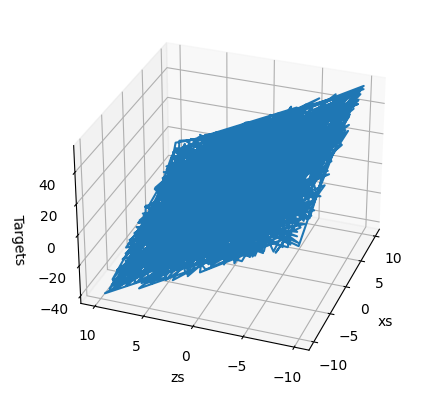

In [4]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=200)

# So far we were just describing the plot. This method actually shows the plot. 
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(observations,1)
xs = xs.reshape(observations,1)
zs = zs.reshape(observations,1)

All right, let's reexamine the linear model y = xw + b. Our algorithm will try to find such values for w and b so the outputs, y, are closest to the targets. Remember, when we performed the gradient descent,we started from an arbitrary number and then proceeded. Well, we must do the same thing now. However, this is tricky. Conventionally, we don't want to start from an arbitrary number we choose. Rather, we randomly select small initial weights. We will talk about that in more detail later. For now, let's declare a variable called init_range and set it to 0.1.

That will be the radius of the range we will use to initialize the weights and the biases. 
Our initial weights and biases will be picked randomly from the interval -0.1 to 0.1. We will generate them as we did so far, by using the  random dot uniform method. The size of the weights matrix is 2x1 as we have two variables, so there are two weights, one for each input variable and a single output. 
Let's declare the bias analogically. The appropriate shape is 1x1, so the bias is a scaler. 
In machine-learning, there are many biases as there are outputs. Each bias refers to an output. If you recall the example we saw earlier about apartment prices and apartment rent, it involved two biases, as there were two outputs.

### Initialize variables

In [5]:
# We will initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# You can play around with the initial range, but we don't really encourage you to do so.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print (weights)
print (biases)

[[0.01521428]
 [0.07085927]]
[0.06022199]


### Set a learning rate

In [6]:
# Set some small learning rate (denoted eta in the lecture). 
# 0.02 is going to work quite well for our example. Once again, you can play around with it.
# It is HIGHLY recommended that you play around with it.
learning_rate = 0.02

You will have to play around with it so you can see how different learning rates affect the speed of optimization.
So, we are all set. We have inputs, targets, and arbitrary numbers for weights and biases. What is left is to vary the weights and biases so our outputs are closest to the targets.
As we know by now, the problem boils down to minimizing the loss function with respect to the weights and the biases. And because this is a regression, we'll use one half the L2 norm loss function.

### Train the model

It is time to train our model. Since this is an iterative problem, we must create a loop which will apply our update rule and calculate the loss function. I'll use a for loop with 100 iterations to complete this task.
Let's see the game plan we'll follow. At each iteration we will calculate the outputs and compare them to the targets through the loss function. We will print the loss for each iteration so we know how the algorithm is doing.
Finally, we will adjust the weights and biases to get a better fit of the data. At the next iteration, these updated weights and biases will provide different outputs. Then the procedure will be repeated.

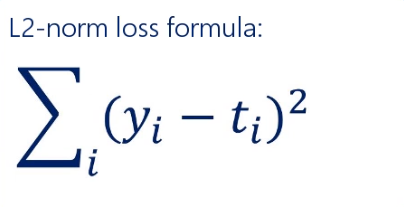

We divide the whole expression by two to get the elegant update rules from the gradient descent.
Let's further augment the loss by dividing it by the number of observations we have. This would give us the average loss per observation or the mean loss.
Similarly to the division by two, this does not change the logic of the loss function. It is still lower than some more accurate results that will be obtained. This little improvement makes the learning independent of the number of observations. Instead of adjusting the learning rate, we adjust the loss. That's valuable as the same learning rate should give us similar results for both 1000 and 1 million observations.

Finally, we must update the weights and biases so they are ready for the next iteration. Using the same rescaling trick I'll also rescale the deltas. This is yet another way to make the algorithm more universal.
So, the new variable is deltas_scaled and equals deltas divided by observations. Let's update the weights.
We will follow the gradient dissent logic. The new weights are equal to the old weights minus the learning rate (eta) times the dot product of the inputs and the deltas_scaled.

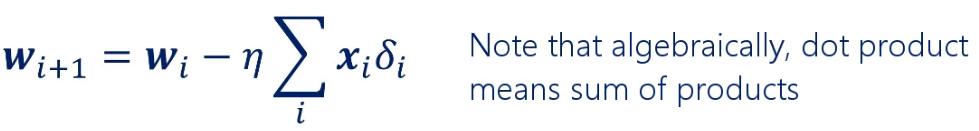

Obviously we cannot simply multiply the inputs and the deltas. This is an issue that may arise occasionally due to the linear algebra involved. To fix it, we must transpose the inputs matrix using the object dot T method.
Now, the matrices are compatible. 2x1000 times 1000x1 is equal to 2x1.
I'd like to spare an extra thought on that. Often when dealing with matrices you find the correct way to code it through dimensionality checks and compatibility errors. However, transposing matrices doesn't affect the information they hold, so we can do it freely.

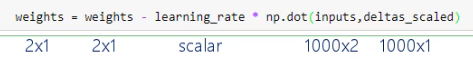

Let's run the code.

In [13]:
# We iterate over our training dataset 100 times. That works well with a learning rate of 0.02.
# The proper number of iterations is something we will talk about later on, but generally
# a lower learning rate would need more iterations, while a higher learning rate would need less iterations
# keep in mind that a high learning rate may cause the loss to diverge to infinity, instead of converge to 0.
for i in range (100):
    
    # This is the linear model: y = xw + b equation
    outputs = np.dot(inputs,weights) + biases
    # The deltas are the differences between the outputs and the targets
    # Note that deltas here is a vector 1000 x 1
    deltas = outputs - targets
        
    # We are considering the L2-norm loss, but divided by 2, so it is consistent with the lectures.
    # Moreover, we further divide it by the number of observations.
    # This is simple rescaling by a constant. We explained that this doesn't change the optimization logic,
    # as any function holding the basic property of being lower for better results, and higher for worse results
    # can be a loss function.
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # We print the loss function value at each step so we can observe whether it is decreasing as desired.
    print (loss)
    
    # Another small trick is to scale the deltas the same way as the loss function
    # In this way our learning rate is independent of the number of samples (observations).
    # Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate
    # that can remain the same if we change the number of training samples (observations).
    # You can try solving the problem without rescaling to see how that works for you.
    deltas_scaled = deltas / observations
    
    # Finally, we must apply the gradient descent update rules from the relevant lecture.
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # We must transpose the inputs so that we get an allowed operation.
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
    # The weights are updated in a linear algebraic way (a matrix minus another matrix)
    # The biases, however, are just a single number here, so we must transform the deltas into a scalar.
    # The two lines are both consistent with the gradient descent methodology. 

0.16450776210830673
0.1645050706505627
0.16450248550540453
0.16450000247348487
0.16449761752133055
0.16449532677479067
0.16449312651274328
0.1644910131610509
0.16448898328675413
0.1644870335924959
0.16448516091116436
0.16448336220074888
0.1644816345393981
0.1644799751206739
0.1644783812489922
0.16447685033524498
0.16447537989259342
0.16447396753242952
0.16447261096049454
0.16447130797315343
0.16447005645381474
0.16446885436949224
0.16446769976750264
0.16446659077229375
0.16446552558239763
0.16446450246750446
0.16446351976565138
0.1644625758805233
0.16446166927885947
0.16446079848796305
0.16445996209330857
0.16445915873624462
0.164458387111786
0.16445764596649495
0.16445693409644435
0.16445625034526198
0.16445559360225254
0.1644549628005932
0.16445435691560067
0.16445377496306635
0.16445321599765814
0.1644526791113847
0.16445216343211996
0.16445166812218712
0.16445119237699762
0.16445073542374392
0.16445029652014453
0.16444987495323818
0.16444947003822538
0.16444908111735634
0.164448707

What we get is a list of numbers that appears to be in descending order, right? 
These are the values of our average loss function. It started from a high value, and at each iteration it became lower and lower until it reached a point where it almost stopped changing. This means we have minimized or almost minimized the loss function with respect to the weights and biases.
Therefore, we have found a linear function that fits the model well. The weights and the biases are optimized
but so are the outputs. Since the optimization process has ended we can check these values.

### Print weights and biases and see if we have worked correctly.

In [14]:
# We print the weights and the biases, so we can see if they have converged to what we wanted.
# When declared the targets, following the f(x,z), we knew the weights should be 2 and -3, while the bias: 5.
print (weights, biases)

# Note that they may be convergING. So more iterations are needed (or a different learning rate).

[[ 1.99943847]
 [-3.00217011]] [5.00153505]


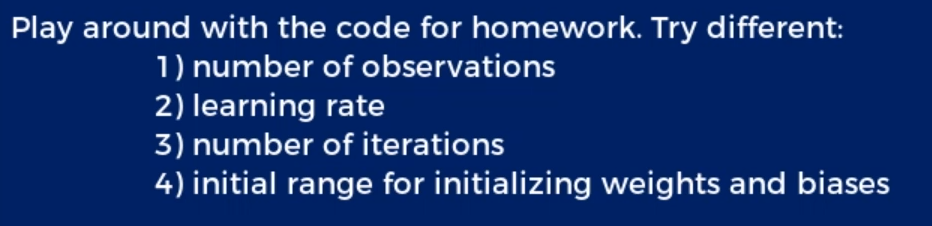

### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

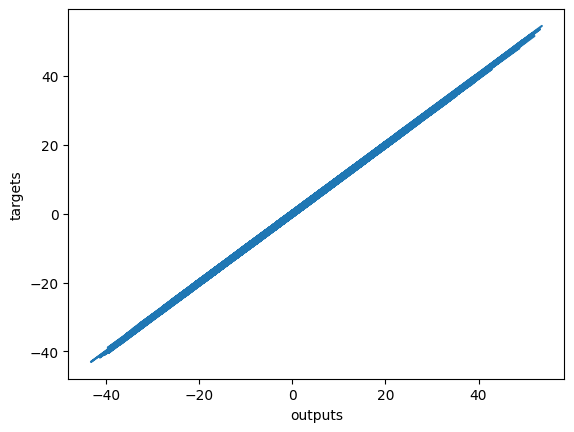

In [15]:
# We print the outputs and the targets in order to see if they have a linear relationship.
# Again, that's not needed. Moreover, in later lectures, that would not even be possible.
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()